In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [81]:
def plotdf(f, xran=[-5, 5], yran=[-5, 5], grid=[21, 21], color='k', norm = False):
    x = np.linspace(xran[0], xran[1], grid[0])
    y = np.linspace(yran[0], yran[1], grid[1])
    
    def dX_dt(X, Y, t=0): return map(eval, f)
    
    X , Y  = np.meshgrid(x, y)  
    DX, DY = dX_dt(X, Y)        
    if norm == True:
        M = (np.hypot(DX, DY))      
        M[ M == 0] = 1.              
        DX = DX/M                   
        DY = DY/M  
    else: None
    plt.quiver(X, Y, DX, DY, pivot='mid', color=color)
    plt.xlim(xran), plt.ylim(yran)
    #plt.grid('on')

### $\textbf{Malthusian}$

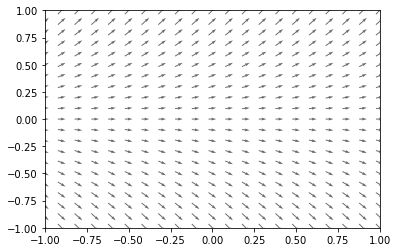

In [85]:
Malth = ["1", "Y"]
plt.figure()
plotdf(Malth, xran=[-1, 1], yran=[-1, 1], color = 'dimgrey')
plt.show()

### $\textbf{Logistic}$

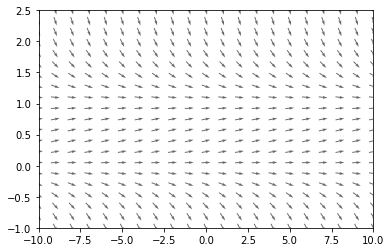

In [83]:
Logistic = ["1","Y*(1-(Y))"]
plt.figure()
plotdf(Logistic, xran=[-10, 10], yran=[-1, 2.5],color = 'dimgrey' ,norm = True)
plt.show()

### $\textbf{Lotka-Volterra}$

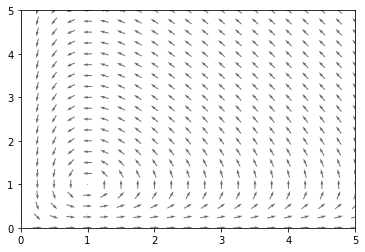

In [84]:
lotka = ["X - X*Y", "X*Y - Y"]
plt.figure()
plotdf(lotka, xran=[0, 5], yran=[0, 5],color = 'dimgrey' ,norm = True)
plt.show()